# Neural Networks project CA3

Cardiac disease Prediction using Back Propagation Algorithm.

Dataset link- https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

**Attribute Information**

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [ ]:
pip install numpy pandas scikit-learn tensorflow matplotlib


In [ ]:
#Importing the libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


# Data Preprocessing

In [ ]:
data = pd.read_csv('/content/heart.csv')

In [ ]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# Data Visualisation

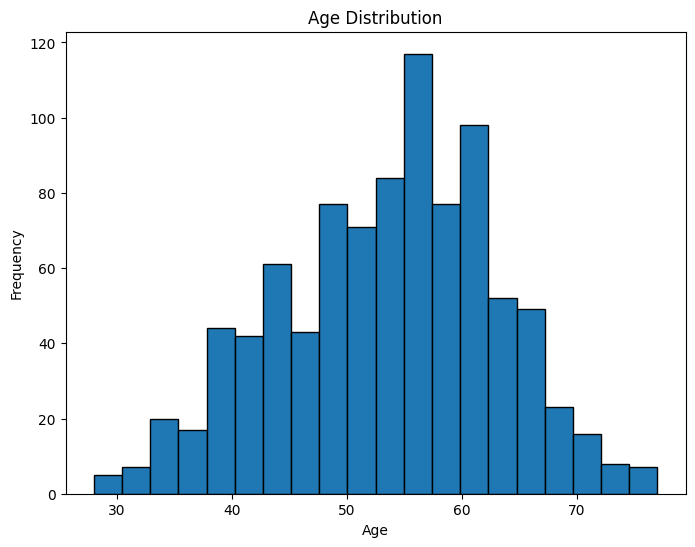

In [ ]:
#Distribution of the features
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=20, edgecolor='k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

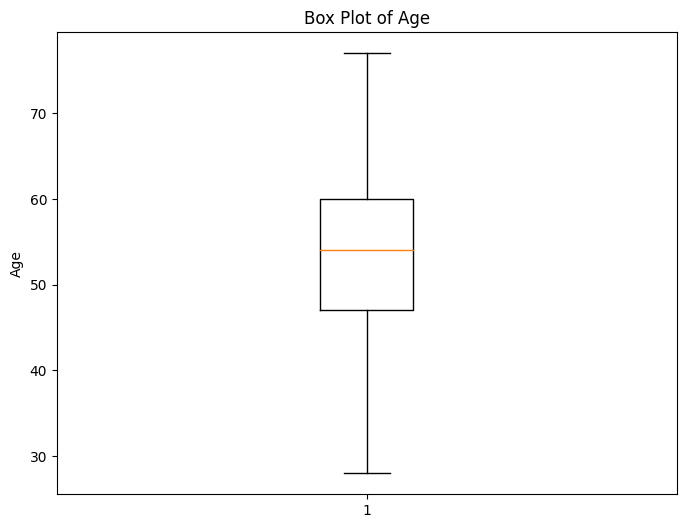

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['Age'])
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

In [ ]:
#Relationship between age and likelihood of contacting heart disease
age_by_heart_disease = data.groupby('HeartDisease')['Age'].mean()
print("Average Age for those without Heart Disease (0):", age_by_heart_disease[0])
print("Average Age for those with Heart Disease (1):", age_by_heart_disease[1])

Average Age for those without Heart Disease (0): 50.551219512195125
Average Age for those with Heart Disease (1): 55.8996062992126


In [ ]:
#Gender distribution in contacting cardiac diseases
from scipy.stats import chi2_contingency

gender_distribution = data['Sex'].value_counts()

gender_heart_disease_counts = data.groupby(['Sex', 'HeartDisease']).size().unstack(fill_value=0)
gender_heart_disease_percentage = (gender_heart_disease_counts / gender_distribution) * 100
print("Gender Distribution:")
print(gender_distribution)
print("\nPercentage of Heart Disease by Gender:")
print(gender_heart_disease_percentage)
chi2, p, _, _ = chi2_contingency(gender_heart_disease_counts)
print("\nChi-squared Test p-value:", p)

Gender Distribution:
M    725
F    193
Name: Sex, dtype: int64

Percentage of Heart Disease by Gender:
      0   1   F   M
Sex                
F   NaN NaN NaN NaN
M   NaN NaN NaN NaN

Chi-squared Test p-value: 4.597617450809164e-20


Unique Chest Pain Types: ['ATA' 'NAP' 'ASY' 'TA']


<Figure size 1000x600 with 0 Axes>

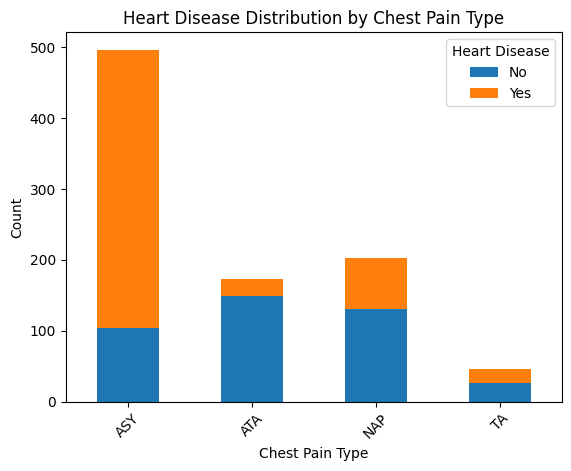

In [ ]:
#Types of Chest pain and it's correlation with heart disease
chest_pain_types = data['ChestPainType'].unique()
print("Unique Chest Pain Types:", chest_pain_types)
chest_pain_heart_disease_counts = data.groupby(['ChestPainType', 'HeartDisease']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
chest_pain_heart_disease_counts.plot(kind='bar', stacked=True)
plt.title('Heart Disease Distribution by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

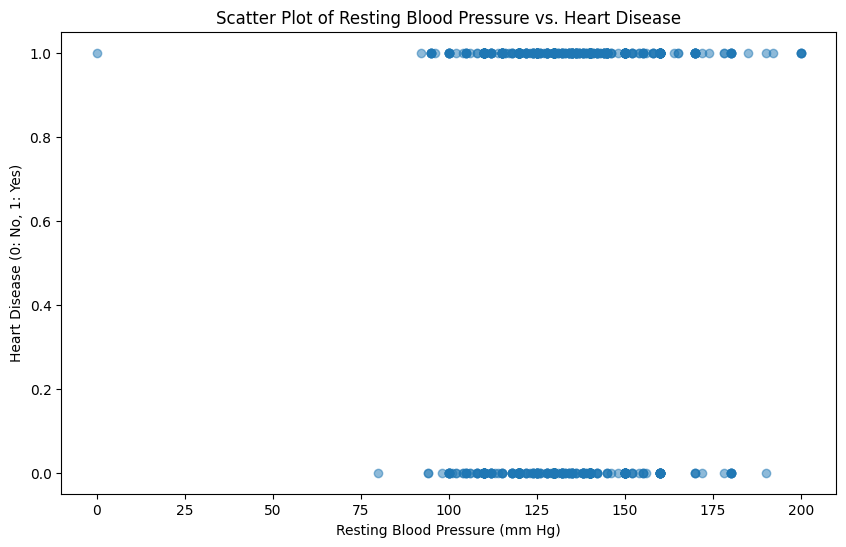

In [ ]:
#correlation between Resting Blood Pressure (RestingBP) and heart disease
plt.figure(figsize=(10, 6))
plt.scatter(data['RestingBP'], data['HeartDisease'], alpha=0.5)
plt.title('Scatter Plot of Resting Blood Pressure vs. Heart Disease')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Heart Disease (0: No, 1: Yes)')
plt.show()

In [ ]:
correlation = data['RestingBP'].corr(data['HeartDisease'])
print("Correlation between Resting Blood Pressure and Heart Disease:", correlation)

Correlation between Resting Blood Pressure and Heart Disease: 0.10758898037140374


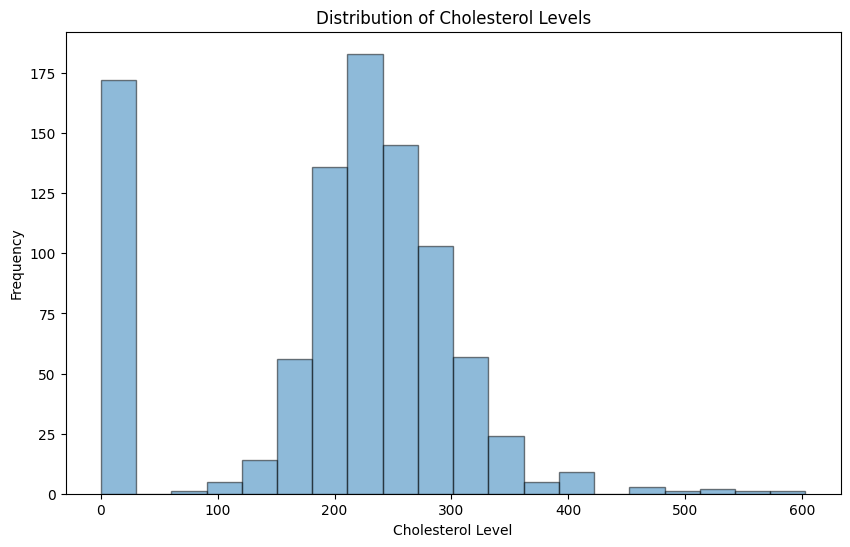

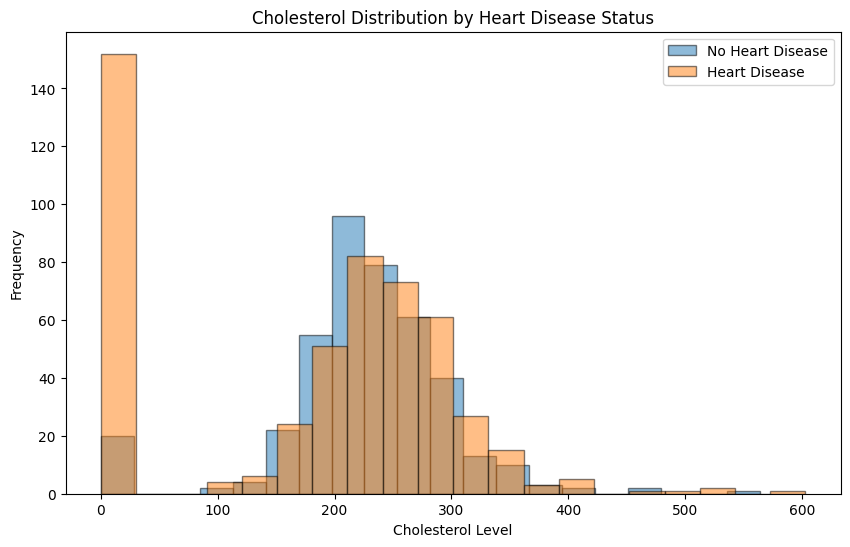

T-Test p-value: 9.308308883532983e-13


In [ ]:
#Distribution of cholesterol levels (Cholesterol) and its relationship with heart disease.

import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
plt.figure(figsize=(10, 6))
plt.hist(data['Cholesterol'], bins=20, edgecolor='k', alpha=0.5)
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.show()

# Step 2: Group by Heart Disease Status and visualize cholesterol distributions
plt.figure(figsize=(10, 6))
plt.hist(data[data['HeartDisease'] == 0]['Cholesterol'], bins=20, edgecolor='k', alpha=0.5, label='No Heart Disease')
plt.hist(data[data['HeartDisease'] == 1]['Cholesterol'], bins=20, edgecolor='k', alpha=0.5, label='Heart Disease')
plt.title('Cholesterol Distribution by Heart Disease Status')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 3: Statistical Comparison (t-test)
cholesterol_no_heart_disease = data[data['HeartDisease'] == 0]['Cholesterol']
cholesterol_heart_disease = data[data['HeartDisease'] == 1]['Cholesterol']

t_statistic, p_value = ttest_ind(cholesterol_no_heart_disease, cholesterol_heart_disease)
print("T-Test p-value:", p_value)

Unique RestingECG Categories: ['Normal' 'ST' 'LVH']


<Figure size 1000x600 with 0 Axes>

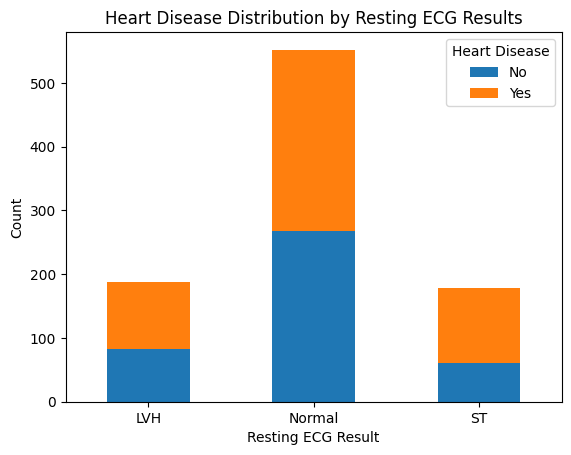

In [ ]:
#distribution of resting electrocardiogram results (RestingECG) and their association with heart disease

import matplotlib.pyplot as plt
resting_ecg_categories = data['RestingECG'].unique()
print("Unique RestingECG Categories:", resting_ecg_categories)
resting_ecg_heart_disease_counts = data.groupby(['RestingECG', 'HeartDisease']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
resting_ecg_heart_disease_counts.plot(kind='bar', stacked=True)
plt.title('Heart Disease Distribution by Resting ECG Results')
plt.xlabel('Resting ECG Result')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

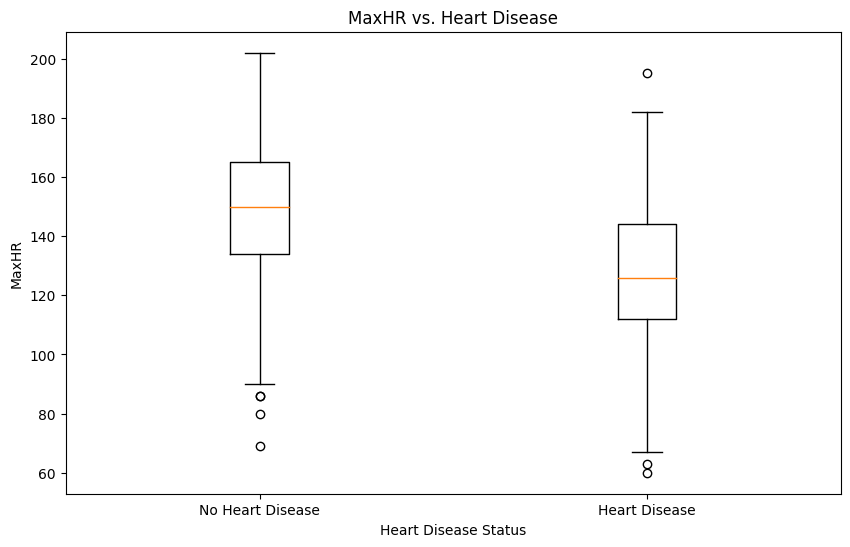

T-Test p-value: 1.1377859840278095e-36


In [ ]:
#relationship between Maximum Heart Rate (MaxHR) and the likelihood of heart disease
from scipy.stats import ttest_ind
maxhr_no_heart_disease = data[data['HeartDisease'] == 0]['MaxHR']
maxhr_heart_disease = data[data['HeartDisease'] == 1]['MaxHR']

mean_maxhr_no_heart_disease = maxhr_no_heart_disease.mean()
median_maxhr_no_heart_disease = maxhr_no_heart_disease.median()
std_maxhr_no_heart_disease = maxhr_no_heart_disease.std()

mean_maxhr_heart_disease = maxhr_heart_disease.mean()
median_maxhr_heart_disease = maxhr_heart_disease.median()
std_maxhr_heart_disease = maxhr_heart_disease.std()
plt.figure(figsize=(10, 6))
plt.boxplot([maxhr_no_heart_disease, maxhr_heart_disease], labels=['No Heart Disease', 'Heart Disease'])
plt.title('MaxHR vs. Heart Disease')
plt.xlabel('Heart Disease Status')
plt.ylabel('MaxHR')
plt.show()
t_statistic, p_value = ttest_ind(maxhr_no_heart_disease, maxhr_heart_disease)
print("T-Test p-value:", p_value)

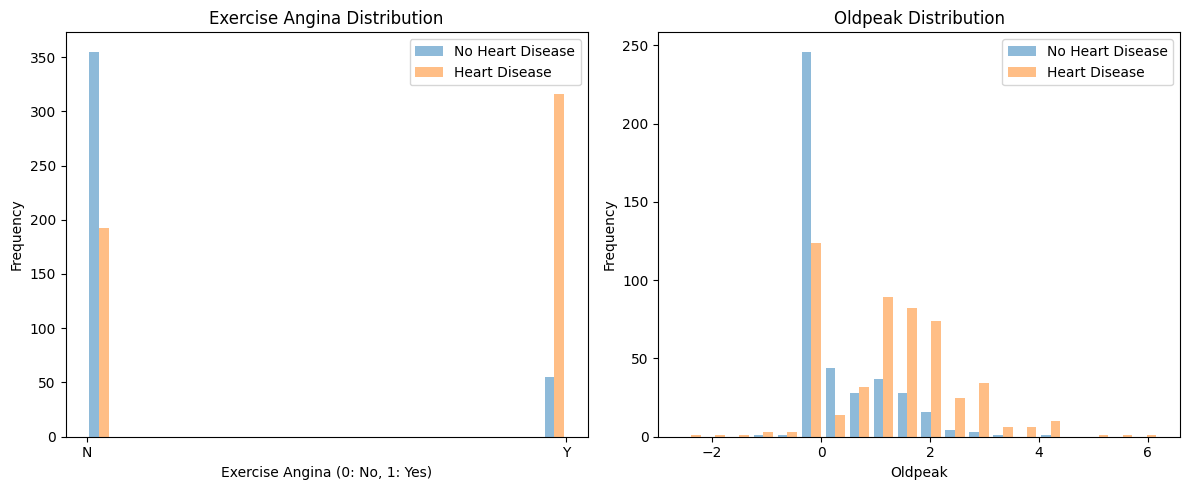

In [ ]:
#Are exercise-induced angina (ExerciseAngina) and ST depression induced by exercise (Oldpeak) significant factors in heart disease prediction?
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

exercise_angina_no_heart_disease = data[data['HeartDisease'] == 0]['ExerciseAngina']
exercise_angina_heart_disease = data[data['HeartDisease'] == 1]['ExerciseAngina']

oldpeak_no_heart_disease = data[data['HeartDisease'] == 0]['Oldpeak']
oldpeak_heart_disease = data[data['HeartDisease'] == 1]['Oldpeak']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist([exercise_angina_no_heart_disease, exercise_angina_heart_disease], bins=20, alpha=0.5, label=['No Heart Disease', 'Heart Disease'])
plt.title('Exercise Angina Distribution')
plt.xlabel('Exercise Angina (0: No, 1: Yes)')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist([oldpeak_no_heart_disease, oldpeak_heart_disease], bins=20, alpha=0.5, label=['No Heart Disease', 'Heart Disease'])
plt.title('Oldpeak Distribution')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

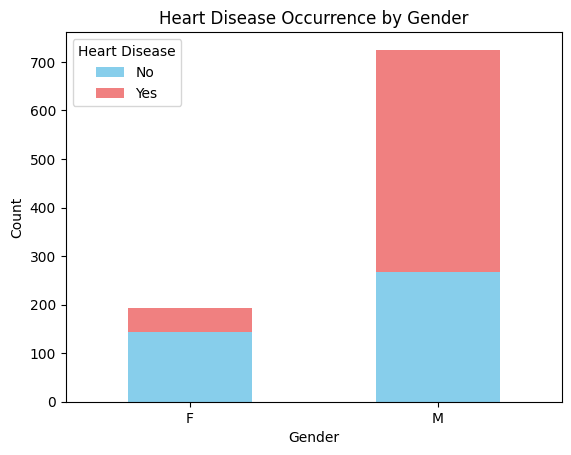

In [ ]:
#Occurance of cardiac diseases between males and females
gender_counts = data['Sex'].value_counts()

heart_disease_counts = data.groupby(['Sex', 'HeartDisease']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
heart_disease_counts.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('Heart Disease Occurrence by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

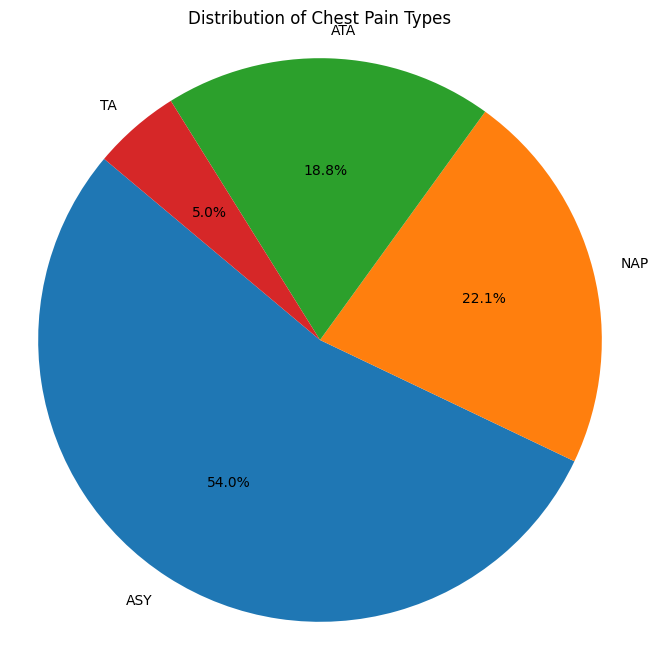

In [ ]:
#Visualize the distribution of different Chest Pain Types.
chest_pain_distribution = data['ChestPainType'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(chest_pain_distribution, labels=chest_pain_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Chest Pain Types')
plt.axis('equal')

plt.show()

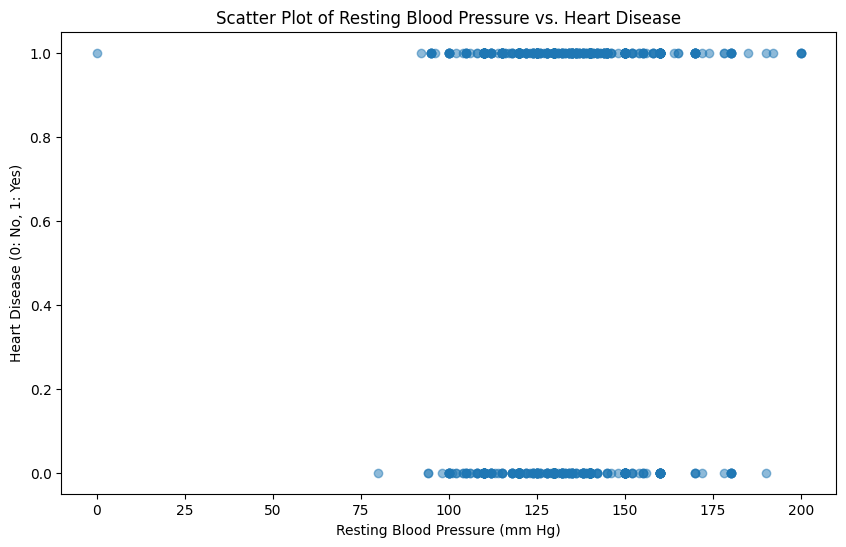

In [ ]:
#Correlation between Resting Blood Pressure and heart disease
resting_bp = data['RestingBP']
heart_disease = data['HeartDisease']

plt.figure(figsize=(10, 6))
plt.scatter(resting_bp, heart_disease, alpha=0.5)
plt.title('Scatter Plot of Resting Blood Pressure vs. Heart Disease')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Heart Disease (0: No, 1: Yes)')
plt.show()

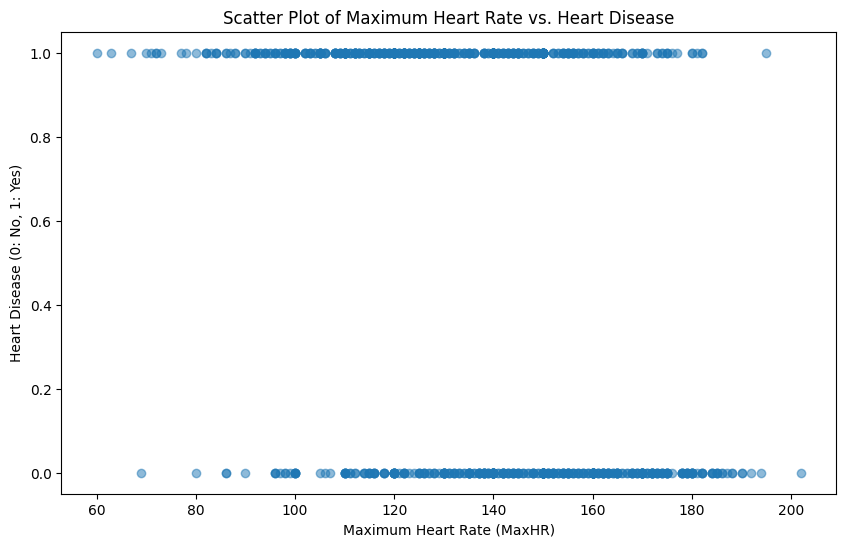

In [ ]:
#The relationship between Maximum Heart Rate (MaxHR) and heart disease
maxhr = data['MaxHR']
heart_disease = data['HeartDisease']

# Step 2: Create the Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(maxhr, heart_disease, alpha=0.5)
plt.title('Scatter Plot of Maximum Heart Rate vs. Heart Disease')
plt.xlabel('Maximum Heart Rate (MaxHR)')
plt.ylabel('Heart Disease (0: No, 1: Yes)')
plt.show()


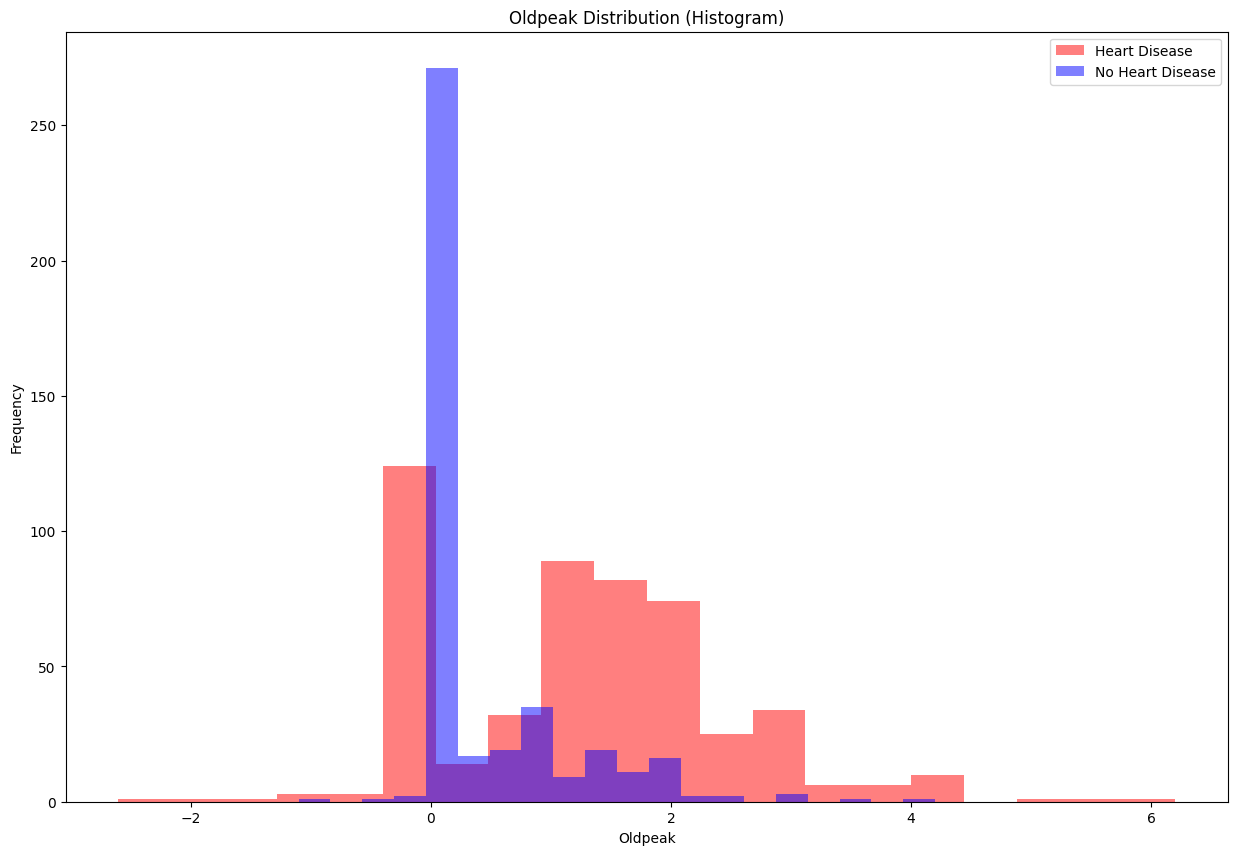

In [ ]:
#The distribution of Oldpeak for heart disease and non-heart disease cases
oldpeak_heart_disease = data[data['HeartDisease'] == 1]['Oldpeak']
oldpeak_no_heart_disease = data[data['HeartDisease'] == 0]['Oldpeak']

plt.figure(figsize=(15, 10))
plt.hist(oldpeak_heart_disease, bins=20, alpha=0.5, color='red', label='Heart Disease')
plt.hist(oldpeak_no_heart_disease, bins=20, alpha=0.5, color='blue', label='No Heart Disease')
plt.title('Oldpeak Distribution (Histogram)')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.legend()

<ipython-input-23-99a998df246d>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(oldpeak_heart_disease, color='red', label='Heart Disease', shade=True)
<ipython-input-23-99a998df246d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(oldpeak_no_heart_disease, color='blue', label='No Heart Disease', shade=True)


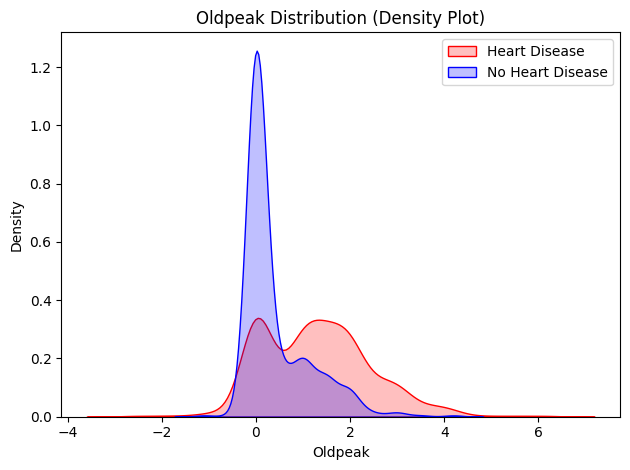

In [ ]:
sns.kdeplot(oldpeak_heart_disease, color='red', label='Heart Disease', shade=True)
sns.kdeplot(oldpeak_no_heart_disease, color='blue', label='No Heart Disease', shade=True)
plt.title('Oldpeak Distribution (Density Plot)')
plt.xlabel('Oldpeak')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

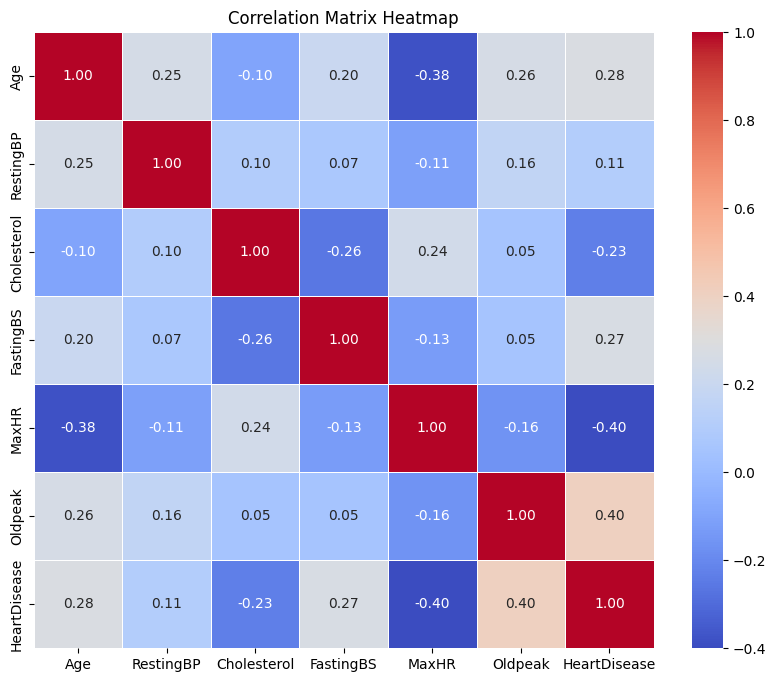

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Building the Neural Network model

In [1]:
#Activation functions for the model , RELU, Softmax and Sigmoid
import numpy as np

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)


In [2]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


In [3]:
import numpy as np

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

# Note: Softmax doesn't have a separate derivative function because it's computed differently during backpropagation.


In [4]:
#Derivation of the activation function
import math
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ

def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ

def softmax_backward(Z,cache):
    Z=cache
    length=10
    dZ=np.zeros((42000,10))
    Z=np.transpose(Z)
    for row in range (0,42000):
            den=(np.sum(np.exp(Z[row,:])))*(np.sum(np.exp(Z[row,:])))
            for col in range (0,10):
                sums=0
                for j in range (0,10):
                    if (j!=col):
                        sums=sums+(math.exp(Z[row,j]))

                dZ[row,col]=(math.exp(Z[row,col])*sums)/den
    dZ=np.transpose(dZ)
    Z=np.transpose(Z)

    assert (dZ.shape == Z.shape)
    return dZ

In [5]:
#initializing the parameters weights and bias
def initialize_parameters_deep(layer_dims):
    #np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    return parameters

In [6]:
#forward propagation
def linear_forward(A, W, b):
    Z = np.dot(W,A) +b
    cache = (A, W, b)
    assert(Z.shape == (W.shape[0], A.shape[1]))
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        #print("Z="+str(Z))
        A, activation_cache = relu(Z)
    elif activation == "softmax":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = softmax(Z)
    cache = (linear_cache, activation_cache)
    return A, cache

def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "softmax")
    caches.append(cache)
    return AL, caches

In [7]:
#cost function
def compute_cost(AL, Y):

    m = Y.shape[1]
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
    #print("cost="+str(cost))
    return cost

In [8]:
#upgrade function for weights and bias
def update_parameters(parameters, grads, learning_rate):
    for l in range(len_update-1):
        parameters["W" + str(l+1)] =parameters["W" + str(l+1)] - (learning_rate*grads["dW" + str(l+1)])
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate*grads["db" + str(l+1)])
    return parameters

In [9]:
def plot_graph(cost_plot):

    x_value=list(range(1,len(cost_plot)+1))
    #print(x_value)
    #print(cost_plot)
    plt.xlabel('iteration')
    plt.ylabel('cost')
    plt.plot(x_value,cost_plot,0.,color='g')

In [10]:
#defining structure of neural network
layers_dims = [784,500,400,300,100,10] #  n-layer model (n=6 including input and output layer)
len_update=len(layers_dims)

In [11]:
#function to call sub_functions
def L_layer_model(X, Y, layers_dims, learning_rate , num_iterations , print_cost=False):#lr was 0.009
    print("training...")
    costs = []
    cost_plot=np.zeros(num_iterations)
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost =compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        cost_plot[i]=cost;

    plot_graph(cost_plot)
    return parameters

In [12]:
#Building the model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your dataset into a pandas DataFrame
# Assuming your DataFrame is named 'data'
# For example, you can load a CSV file like this:
data = pd.read_csv('/content/heart.csv')

# Preprocessing the data
# Assuming 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', and 'Oldpeak' are numerical features
# Assuming 'Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', and 'ST_Slope' are categorical features

# Convert categorical variables into one-hot encoding
data = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

# Split features and target variable
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()

# Add input layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
23/23 [==============================] - 2s 29ms/step - loss: 0.5820 - accuracy: 0.7234 - val_loss: 0.4861 - val_accuracy: 0.8207
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 0.4064 - accuracy: 0.8542 - val_loss: 0.3721 - val_accuracy: 0.8478
Epoch 3/50
23/23 [==============================] - 0s 6ms/step - loss: 0.3359 - accuracy: 0.8787 - val_loss: 0.3403 - val_accuracy: 0.8641
Epoch 4/50
23/23 [==============================] - 0s 6ms/step - loss: 0.3115 - accuracy: 0.8801 - val_loss: 0.3322 - val_accuracy: 0.8641
Epoch 5/50
23/23 [==============================] - 0s 6ms/step - loss: 0.2964 - accuracy: 0.8828 - val_loss: 0.3253 - val_accuracy: 0.8696
Epoch 6/50
23/23 [==============================] - 0s 6ms/step - loss: 0.2857 - accuracy: 0.8842 - val_loss: 0.3308 - val_accuracy: 0.8804
Epoch 7/50
23/23 [==============================] - 0s 6ms/step - loss: 0.2800 - accuracy: 0.8828 - val_loss: 0.3104 - val_accuracy: 0.8804
Epoch 8/50
23/23 [=

In [13]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


6/6 [==============================] - 0s 3ms/step - loss: 0.4682 - accuracy: 0.8859
Test Loss: 0.46821850538253784, Test Accuracy: 0.885869562625885


In [14]:
#backward propagation
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1./m * np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ, axis=1, keepdims=True);
    dA_prev = np.dot(W.T,dZ)
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == "softmax":
        dZ = softmax_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    M=len(layers_dims)
    current_cache = caches[M-2]
    grads["dA"+str(M-1)], grads["dW"+str(M-1)], grads["db"+str(M-1)] = linear_activation_backward(dAL, current_cache, activation = "softmax")#M-1
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

In [15]:
#Back Propagation
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
23/23 [==============================] - 0s 8ms/step - loss: 0.0737 - accuracy: 0.9755 - val_loss: 0.5176 - val_accuracy: 0.8696
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 0.0704 - accuracy: 0.9728 - val_loss: 0.4859 - val_accuracy: 0.8533
Epoch 3/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0692 - accuracy: 0.9796 - val_loss: 0.5450 - val_accuracy: 0.8587
Epoch 4/50
23/23 [==============================] - 0s 6ms/step - loss: 0.0644 - accuracy: 0.9809 - val_loss: 0.5176 - val_accuracy: 0.8533
Epoch 5/50
23/23 [==============================] - 0s 6ms/step - loss: 0.0607 - accuracy: 0.9823 - val_loss: 0.4995 - val_accuracy: 0.8750
Epoch 6/50
23/23 [==============================] - 0s 5ms/step - loss: 0.0600 - accuracy: 0.9782 - val_loss: 0.4998 - val_accuracy: 0.8750
Epoch 7/50
23/23 [==============================] - 0s 6ms/step - loss: 0.0547 - accuracy: 0.9891 - val_loss: 0.5314 - val_accuracy: 0.8804
Epoch 8/50
23/23 [==

In [16]:
#Learning rate tuning
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
#Batch Normalisatuon
from tensorflow.keras.layers import BatchNormalization

model.add(BatchNormalization())


In [18]:
#Dropout regularisation
from tensorflow.keras.layers import Dropout

# Add dropout layers after each dense layer with the dropout rate you prefer
model.add(Dropout(0.5))


In [19]:
#Early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/100
23/23 [==============================] - 2s 19ms/step - loss: 4.3508 - accuracy: 0.7180 - val_loss: 1.4909 - val_accuracy: 0.8370
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 4.3376 - accuracy: 0.7139 - val_loss: 1.0089 - val_accuracy: 0.8533
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 4.3300 - accuracy: 0.7180 - val_loss: 1.0368 - val_accuracy: 0.8913
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 4.4351 - accuracy: 0.7112 - val_loss: 0.8288 - val_accuracy: 0.8804
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 4.3170 - accuracy: 0.7139 - val_loss: 1.8660 - val_accuracy: 0.8261
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 4.3306 - accuracy: 0.7180 - val_loss: 1.3451 - val_accuracy: 0.8587
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 4.6238 - accuracy: 0.7003 - val_loss: 1.5434 - val_accuracy: 0.8424
Epoch 8/100


In [20]:
#Weight regularization
from tensorflow.keras.regularizers import l2

model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))


In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

# Use the Adam optimizer with gradient clipping by norm
optimizer = Adam(learning_rate=lr_schedule, clipnorm=1.0)  # Set clipnorm to your preferred value


In [23]:
# Assuming you have trained your model using model.fit() as shown in the original code

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Print the final results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)





6/6 [==============================] - 0s 3ms/step - loss: 0.8288 - accuracy: 0.8804
Test Loss: 0.8287985324859619
Test Accuracy: 0.8804348111152649




Accuracy: An accuracy of 88.04% indicates that the model is performing reasonably well. It correctly classifies heart disease cases almost 9 out of 10 times.









